In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [20]:
train_dir = os.path.join('', 'train')
train_files = os.listdir(train_dir)
print(f"Total training images: {len(train_files)}")
dogs = [file for file in train_files if 'dog' in file]
cats = [file for file in train_files if 'cat' in file]
print(f"Number of dog images: {len(dogs)}")
print(f"Number of cat images: {len(cats)}")

Total training images: 1531
Number of dog images: 728
Number of cat images: 802


In [12]:
test_dir = os.path.join('', 'test')
test_files = os.listdir(test_dir)
print(f"Total test images: {len(test_files)}")

Total test images: 1318


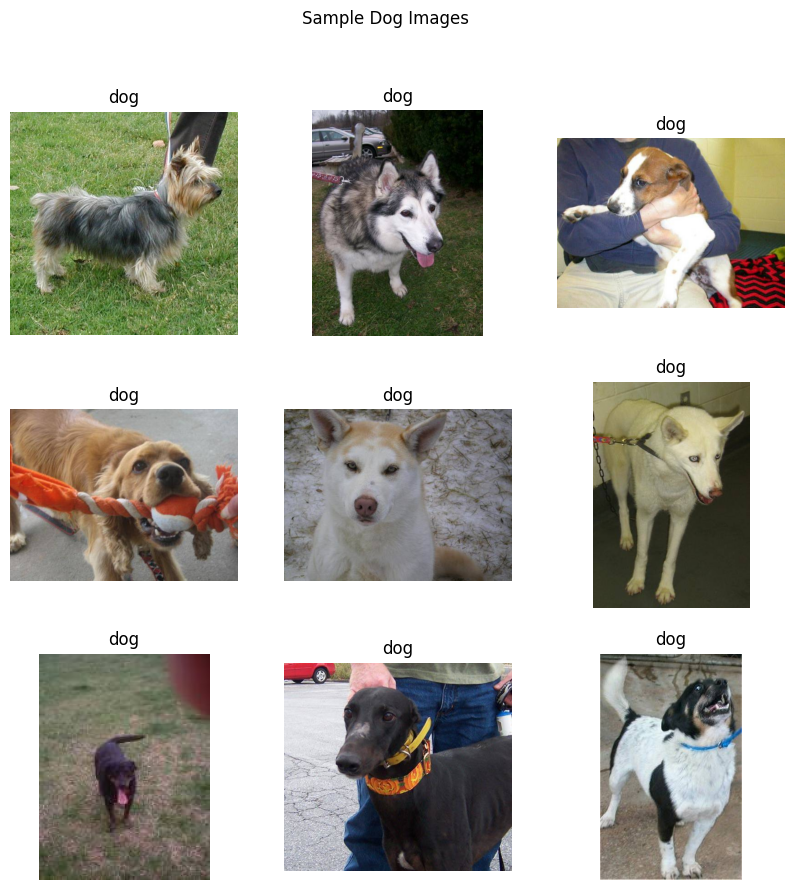

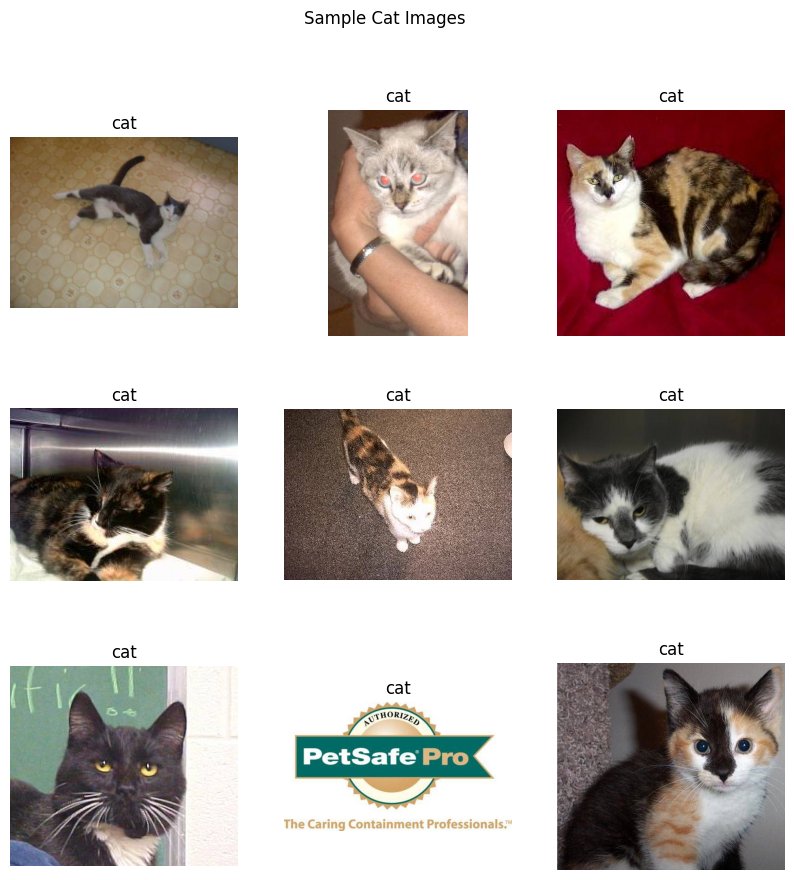

In [13]:
def show_sample_images(files, title):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img = Image.open(os.path.join(train_dir, files[i]))
        plt.imshow(img)
        plt.title(files[i].split('.')[0])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_sample_images(dogs[:9], 'Sample Dog Images')
show_sample_images(cats[:9], 'Sample Cat Images')

In [14]:
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [17]:
def load_images_and_labels(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (100, 100))
            images.append(image.flatten())
            labels.append(0 if 'cat' in filename else 1)
    return np.array(images), np.array(labels)

X_train, y_train = load_images_and_labels(train_dir)
X_test, y_test = load_images_and_labels(test_dir)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf'],
}

svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

svm_model = SVC(**best_params)
svm_model.fit(X_train, y_train)

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


SVC(C=10, gamma=0.001)

In [24]:
y_pred = svm_model.predict(X_test)
for filename, pred in zip(test_files, y_pred):
    print(f"File: {filename}, Predicted class: {'dog' if pred == 1 else 'cat'}")

File: 9352.jpg, Predicted class: cat
File: 8916.jpg, Predicted class: cat
File: 9673.jpg, Predicted class: cat
File: 9240.jpg, Predicted class: cat
File: 9440.jpg, Predicted class: cat
File: 9834.jpg, Predicted class: cat
File: 9849.jpg, Predicted class: cat
File: 894.jpg, Predicted class: cat
File: 9263.jpg, Predicted class: cat
File: 9512.jpg, Predicted class: cat
File: 9984.jpg, Predicted class: cat
File: 9968.jpg, Predicted class: cat
File: 9398.jpg, Predicted class: cat
File: 9386.jpg, Predicted class: cat
File: 9683.jpg, Predicted class: cat
File: 9171.jpg, Predicted class: cat
File: 914.jpg, Predicted class: cat
File: 9032.jpg, Predicted class: cat
File: 9933.jpg, Predicted class: cat
File: 9229.jpg, Predicted class: cat
File: 9338.jpg, Predicted class: cat
File: 9997.jpg, Predicted class: cat
File: 8941.jpg, Predicted class: cat
File: 9783.jpg, Predicted class: cat
File: 9477.jpg, Predicted class: cat
File: 9867.jpg, Predicted class: cat
File: 9011.jpg, Predicted class: cat
Fil